# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data 

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-09-18 13:38:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   186MB/s    in 0.6s    

2021-09-18 13:38:48 (186 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os 

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"there are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

there are 2 directory and 1 images in 'pizza_steak'.
there are 2 directory and 1 images in 'pizza_steak/train'.
there are 0 directory and 750 images in 'pizza_steak/train/pizza'.
there are 0 directory and 750 images in 'pizza_steak/train/steak'.
there are 2 directory and 1 images in 'pizza_steak/test'.
there are 0 directory and 250 images in 'pizza_steak/test/pizza'.
there are 0 directory and 250 images in 'pizza_steak/test/steak'.


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Sep 18 13:38 .
drwxr-xr-x 1 root root 4096 Sep 18 13:38 ..
-rw-r--r-- 1 root root 6148 Sep 18 13:38 .DS_Store
drwxr-xr-x 4 root root 4096 Sep 18 13:38 test
drwxr-xr-x 4 root root 4096 Sep 18 13:38 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [8]:
# Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectory
class_names = class_names[1:] # remove .DS_Strore
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Seup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # Show the shape of the image

  return img

['874288.jpg']
Image shape: (512, 512, 3)


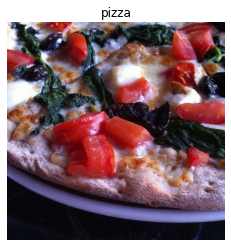

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[208, 185, 169],
        [236, 212, 200],
        [250, 230, 223],
        ...,
        [ 17,  11,  15],
        [ 15,   9,  13],
        [ 13,   7,  11]],

       [[229, 207, 193],
        [250, 228, 217],
        [255, 240, 234],
        ...,
        [ 15,   9,  13],
        [ 15,   9,  13],
        [ 15,   9,  13]],

       [[249, 229, 218],
        [255, 236, 229],
        [255, 241, 239],
        ...,
        [ 13,   7,  11],
        [ 14,   8,  12],
        [ 16,  10,  14]],

       ...,

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [  9,  10,  15],
        ...,
        [  7,  11,  20],
        [  7,  11,  20],
        [  8,  12,  21]],

       [[  9,  10,  14],
        [  9,  10,  14],
        [ 10,  11,  16],
        ...,
        [  9,  13,  22],
        [  8,  12,  21],
        [  7,  11,  20]],

       [[  8,   9,  13],
        [  9,  10,  14],
        [ 10,  11,  15],
        ...,
        [ 10,  14,  2

In [12]:
# Vire the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel value between 0 & 1
img/255.

array([[[0.81568627, 0.7254902 , 0.6627451 ],
        [0.9254902 , 0.83137255, 0.78431373],
        [0.98039216, 0.90196078, 0.8745098 ],
        ...,
        [0.06666667, 0.04313725, 0.05882353],
        [0.05882353, 0.03529412, 0.05098039],
        [0.05098039, 0.02745098, 0.04313725]],

       [[0.89803922, 0.81176471, 0.75686275],
        [0.98039216, 0.89411765, 0.85098039],
        [1.        , 0.94117647, 0.91764706],
        ...,
        [0.05882353, 0.03529412, 0.05098039],
        [0.05882353, 0.03529412, 0.05098039],
        [0.05882353, 0.03529412, 0.05098039]],

       [[0.97647059, 0.89803922, 0.85490196],
        [1.        , 0.9254902 , 0.89803922],
        [1.        , 0.94509804, 0.9372549 ],
        ...,
        [0.05098039, 0.02745098, 0.04313725],
        [0.05490196, 0.03137255, 0.04705882],
        [0.0627451 , 0.03921569, 0.05490196]],

       ...,

       [[0.03921569, 0.04313725, 0.05882353],
        [0.03921569, 0.04313725, 0.05882353],
        [0.03529412, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images 
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setuo paths to ours data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN 
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 44s 252ms/step - loss: 0.5770 - accuracy: 0.7087 - val_loss: 0.4662 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4344 - accuracy: 0.8067 - val_loss: 0.3342 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3947 - accuracy: 0.8280 - val_loss: 0.3456 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3535 - accuracy: 0.8540 - val_loss: 0.3193 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3046 - accuracy: 0.8740 - val_loss: 0.3065 - val_accuracy: 0.8740


**Note:** If the above call is taking longer than ~10 seconds per epoch, make sure your're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).



In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before 

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorfFlow playground.

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
 tf.keras.layers.Dense(4, activation='relu'),
 tf.keras.layers.Dense(4, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')                              
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 0.9935 - accuracy: 0.4907 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 2.6093 - accuracy: 0.6273 - val_loss: 1.0688 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.9930 - accuracy: 0.7053 - val_loss: 0.5690 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5178 - accuracy: 0.7660 - val_loss: 0.6091 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.8598 - accuracy: 0.6973 - val_loss: 0.6021 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5674 - accuracy: 0.7607 - val_loss: 0.5154 - val_accuracy: 0.7820


In [19]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data**. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. We here a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image. 

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Perprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1313316.jpg']
Image shape: (384, 512, 3)
['1743389.jpg']
Image shape: (512, 512, 3)


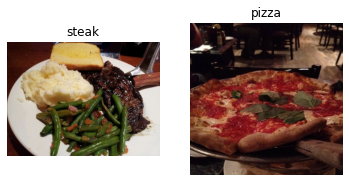

In [20]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [21]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A bathch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reason:
1. 10,00 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?


In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Load in our image data from directories and turn them into bathes
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images 
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode='binary', # type of data you're wotking with
                                               batch_size=32) # size of mimibatchs to load data into                                              

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [25]:
# How many batches are there?
len(train_data)

47

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [27]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you cloud create. So one of the best ways to gets started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [28]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=3, # the size of the sliding window going across an input 
         strides=1, # the size of the step the sliding window takes across an input
         padding='valid', # if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (working binary classification so only 1 output neuron)
])

In [30]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [31]:
# Get the summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [32]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data, # This is the combination of labels and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      )

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 1.0643 - accuracy: 0.6693 - val_loss: 0.4669 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4533 - accuracy: 0.8133 - val_loss: 0.3921 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3503 - accuracy: 0.8580 - val_loss: 0.4158 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.1864 - accuracy: 0.9360 - val_loss: 0.4439 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.0740 - accuracy: 0.9820 - val_loss: 0.5224 - val_accuracy: 0.7840


### 5. Evaluate our model

It looks like our model is learning something, let's evaluate it.

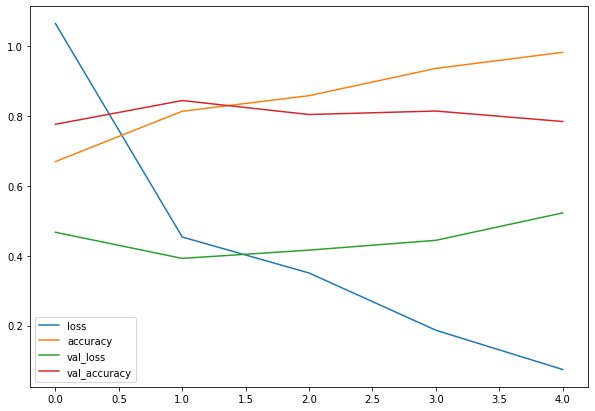

In [34]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [35]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns reparate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

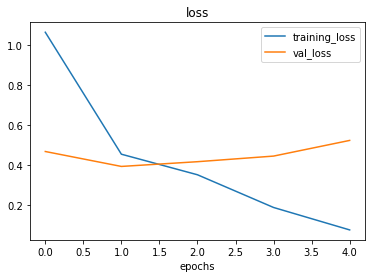

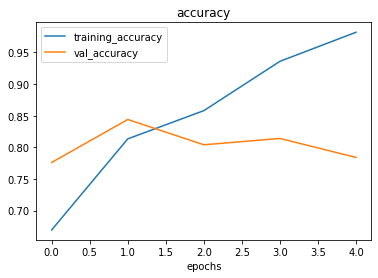

In [36]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. adjust the model paremeters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting 

Way to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce iverfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regualarization**.

In [37]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [38]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 0.6078 - accuracy: 0.6573 - val_loss: 0.4751 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4615 - accuracy: 0.7933 - val_loss: 0.3901 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4133 - accuracy: 0.8247 - val_loss: 0.3591 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4247 - accuracy: 0.8187 - val_loss: 0.3595 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3688 - accuracy: 0.8427 - val_loss: 0.3552 - val_accuracy: 0.8420


In [40]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

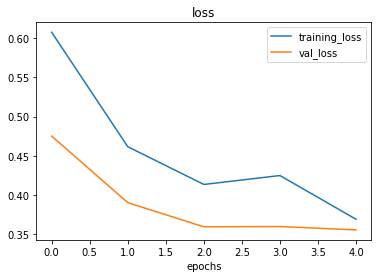

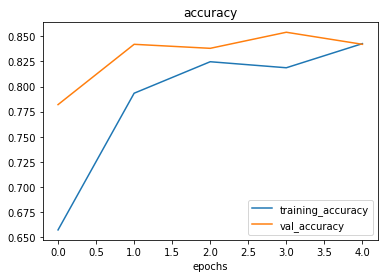

In [41]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Note:** Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [43]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstration purpose only

# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches     
print('Non-augmented test data:')            
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')                                                  

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directory but are modified as they're loaded into the model.

In [44]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 27


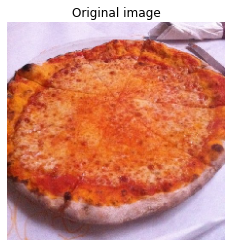

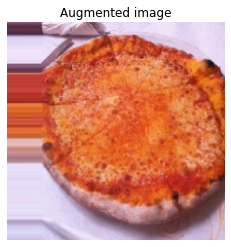

In [45]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # batch sizes are 32
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [46]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 521ms/step - loss: 0.7035 - accuracy: 0.4753 - val_loss: 0.6811 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6907 - accuracy: 0.5867 - val_loss: 0.6756 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 24s 519ms/step - loss: 0.6839 - accuracy: 0.5733 - val_loss: 0.6287 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 25s 522ms/step - loss: 0.6678 - accuracy: 0.6260 - val_loss: 0.6083 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6270 - accuracy: 0.6720 - val_loss: 0.4955 - val_accuracy: 0.8280


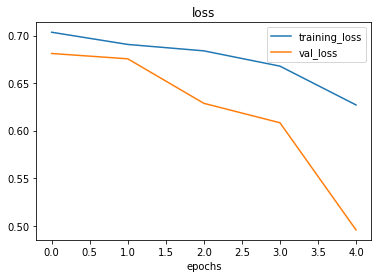

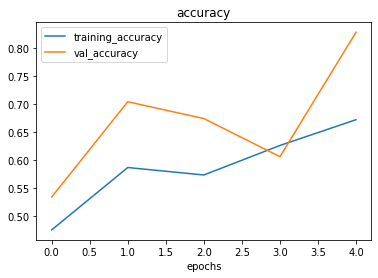

In [47]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens 

In [48]:
# Import data and augment it and shuffle from traing directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time 


Found 1500 images belonging to 2 classes.


In [49]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 0.6520 - accuracy: 0.5887 - val_loss: 0.5732 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 25s 523ms/step - loss: 0.5979 - accuracy: 0.6747 - val_loss: 0.5050 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.5501 - accuracy: 0.7287 - val_loss: 0.4234 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5149 - accuracy: 0.7533 - val_loss: 0.4375 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 24s 507ms/step - loss: 0.4993 - accuracy: 0.7593 - val_loss: 0.3472 - val_accuracy: 0.8540


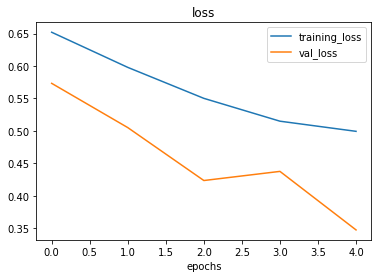

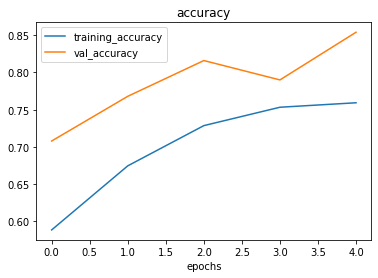

In [50]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Reapeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increae the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer learning** to leverage what another image model has learn and adjust it for our own use case 

## Making a prediction with our trained model on our own custom data

In [51]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


--2021-09-18 13:48:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-18 13:48:39 (33.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



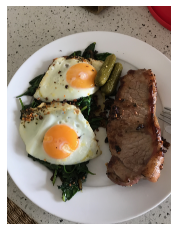

In [52]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
# Check the shape of our image 
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [54]:
# Create a function to import and image and resize it to be able to used with our model
def load_and_prep_image(filename, image_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape ot to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[224, 224])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [55]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.92047036]], dtype=float32)

Looks like our custom image is being put through out model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [57]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [58]:
# We can index the predicted class by prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [59]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the targer image and preprocess it 
  img = load_and_prep_image(filename)
  
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

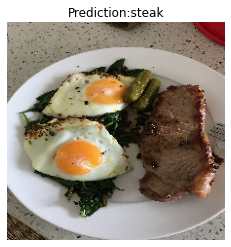

In [60]:
# Test our model on the custom image
pred_and_plot(model_7, '03-steak.jpeg')

--2021-09-18 13:48:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-09-18 13:48:42 (43.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



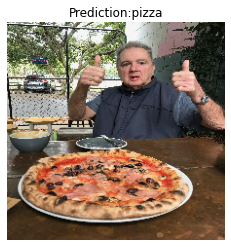

In [61]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [62]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-09-18 13:48:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 142.250.152.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   189MB/s    in 2.6s    

2021-09-18 13:48:45 (189 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [63]:
import os 

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [64]:
# Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [65]:
# Let's get the class names
import pathlib 
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1624832.jpg']
Image shape: (512, 512, 3)


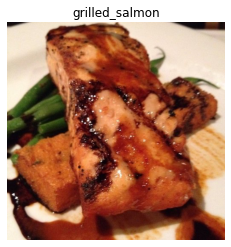

In [66]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for model)

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 output neurons the softmax activation function
])

# Compile the model 
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']) 

### 4. Fit a model

In [69]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 232ms/step - loss: 2.2425 - accuracy: 0.1464 - val_loss: 2.1119 - val_accuracy: 0.2032
Epoch 2/5
235/235 [==============================] - 53s 225ms/step - loss: 2.0004 - accuracy: 0.2915 - val_loss: 1.8985 - val_accuracy: 0.3468
Epoch 3/5
235/235 [==============================] - 55s 235ms/step - loss: 1.5978 - accuracy: 0.4576 - val_loss: 2.0166 - val_accuracy: 0.3000
Epoch 4/5
235/235 [==============================] - 56s 237ms/step - loss: 0.9493 - accuracy: 0.6909 - val_loss: 2.6136 - val_accuracy: 0.2984
Epoch 5/5
235/235 [==============================] - 54s 229ms/step - loss: 0.3792 - accuracy: 0.8823 - val_loss: 3.5359 - val_accuracy: 0.2796


### 5. Evaluate the model

In [70]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 3.5359 - accuracy: 0.2796


[3.535919427871704, 0.27959999442100525]

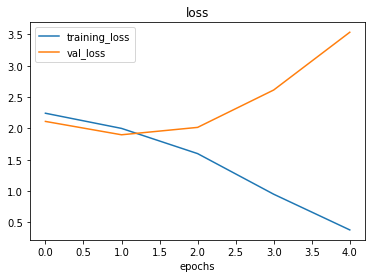

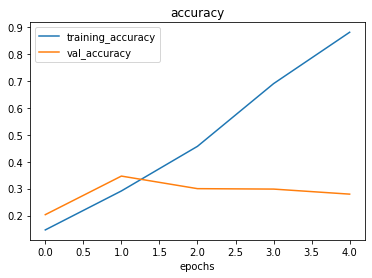

In [74]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seemms our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning somthing...

However, it's not generalizing well to unseen data(overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it(without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you use those patterns on your own dataset



In [79]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...

model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [81]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.1065 - accuracy: 0.2425 - val_loss: 1.9588 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.8121 - accuracy: 0.3828 - val_loss: 1.9116 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.5411 - accuracy: 0.4911 - val_loss: 1.9852 - val_accuracy: 0.3272
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 1.1894 - accuracy: 0.6175 - val_loss: 2.0171 - val_accuracy: 0.3348
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.7717 - accuracy: 0.7693 - val_loss: 2.3452 - val_accuracy: 0.3232


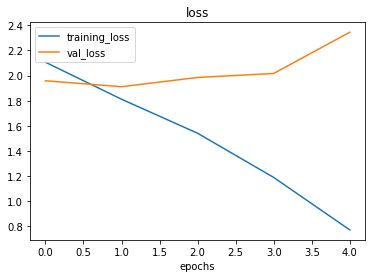

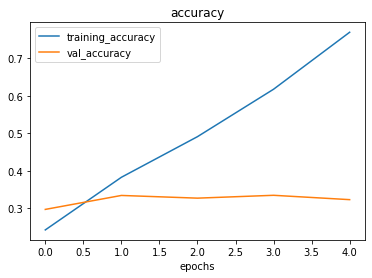

In [82]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [80]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [76]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)       

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?



### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [83]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [84]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [88]:
# Fit the model 
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 127s 539ms/step - loss: 2.1770 - accuracy: 0.1988 - val_loss: 1.9984 - val_accuracy: 0.2896
Epoch 2/5
235/235 [==============================] - 125s 533ms/step - loss: 2.0780 - accuracy: 0.2573 - val_loss: 1.9293 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 125s 530ms/step - loss: 2.0246 - accuracy: 0.2865 - val_loss: 1.8450 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 128s 547ms/step - loss: 1.9753 - accuracy: 0.3088 - val_loss: 1.8133 - val_accuracy: 0.3824
Epoch 5/5
235/235 [==============================] - 126s 536ms/step - loss: 1.9494 - accuracy: 0.3207 - val_loss: 1.7683 - val_accuracy: 0.3884


In [89]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 3.5359 - accuracy: 0.2796


[3.5359203815460205, 0.27959999442100525]

In [90]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.7683 - accuracy: 0.3884


[1.7682746648788452, 0.38839998841285706]

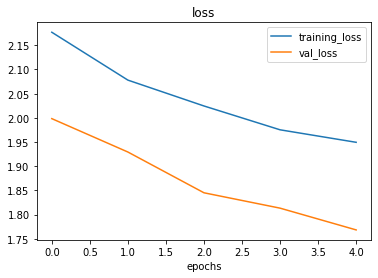

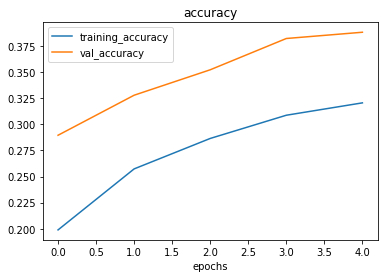

In [91]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

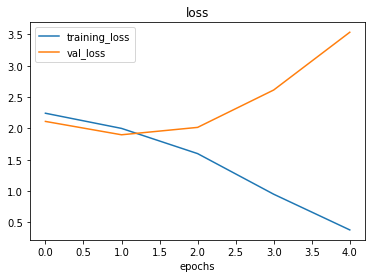

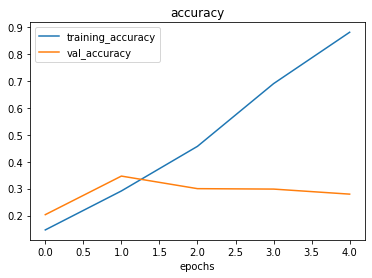

In [92]:
plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer to each other the baseline model and they look like they're heading in the right direction (certrainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning** 

### Making a prediction with our trained model

In [94]:
# Remind ourselves of the classes out model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [95]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-09-18 16:54:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-09-18 16:54:31 (39.6 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2021-09-18 16:54:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [100]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the targer image and preprocess it 
  img = load_and_prep_image(filename)
  
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

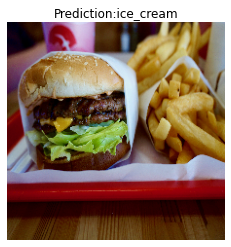

In [107]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

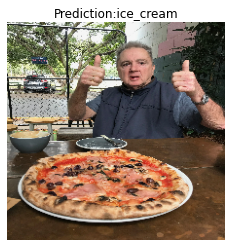

In [102]:
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

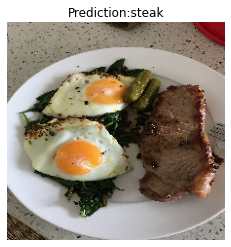

In [103]:
pred_and_plot(model=model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

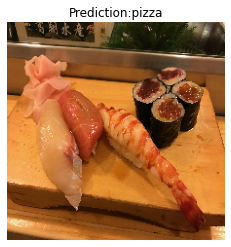

In [104]:
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

### Saving and loading our model

In [108]:
# Save a model
model_10.save('save_trained_model_10')

INFO:tensorflow:Assets written to: save_trained_model_10/assets


In [110]:
# Load in a trained model and evaluate it 
loaded_model_10 = tf.keras.models.load_model('save_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.7683 - accuracy: 0.3884


[1.7682744264602661, 0.38839998841285706]

In [112]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 12s 157ms/step - loss: 1.7683 - accuracy: 0.3884


[1.768274188041687, 0.38839998841285706]